## Import Libraries

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
#from pandas.api.types import is_string_dtype, is_integer_dtype, is_bool_dtype

## Import Data

In [6]:
df = pd.read_csv('/Users/apurvainamdar/Downloads/reddit_wsb.csv')
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
title        53187 non-null object
score        53187 non-null int64
id           53187 non-null object
url          53187 non-null object
comms_num    53187 non-null int64
created      53187 non-null float64
body         24738 non-null object
timestamp    53187 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


## Describing the Data

In [10]:
df.describe(include = "all")

,title,score,id,url,comms_num,created,body,timestamp
count,53187,53187.000000,53187,53187,53187.000000,5.318700e+04,24738,53187
unique,52049,NaN,53187,53172,NaN,NaN,24147,43460
top,AMC,NaN,m5knku,https://magic.freetrade.io/join/jamie/13edb513,NaN,NaN,Your daily trading discussion thread. Please k...,2021-01-29 01:03:59
freq,40,NaN,1,11,NaN,NaN,74,14
mean,NaN,1382.461053,NaN,NaN,263.260252,1.614582e+09,NaN,NaN
std,NaN,7999.271074,NaN,NaN,2532.665113,4.173566e+06,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,1.601340e+09,NaN,NaN
25%,NaN,2.000000,NaN,NaN,3.000000,1.611882e+09,NaN,NaN
50%,NaN,37.000000,NaN,NaN,17.000000,1.612488e+09,NaN,NaN
75%,NaN,207.000000,NaN,NaN,60.000000,1.615347e+09,NaN,NaN


## Dealing with the Missing Values

In [11]:
df.isnull().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         28449
timestamp        0
dtype: int64

In [22]:
missing_count = df.isnull().sum() # the sum of missing values
value_count = df.isnull().count() # the count of missing values
missing_percentage = round(missing_count/value_count * 100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count':missing_count, 'percentage':missing_percentage}) # create a dataframe
#missing_percentage
print(missing_df)

           count  percentage
title          0        0.00
score          0        0.00
id             0        0.00
url            0        0.00
comms_num      0        0.00
created        0        0.00
body       28449       53.49
timestamp      0        0.00


### Visualizing the Missing values

In [32]:
print(missing_percentage)

title         0.00
score         0.00
id            0.00
url           0.00
comms_num     0.00
created       0.00
body         53.49
timestamp     0.00
dtype: float64


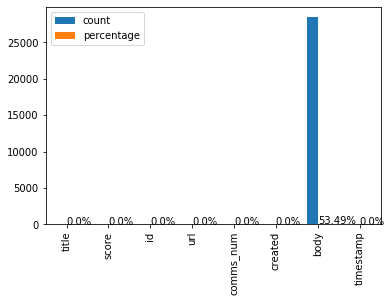

In [33]:
ax = missing_df.plot.bar()

for index, percentage in enumerate(missing_percentage):
    ax.text(index,percentage, str(percentage) + '%')

## Feature Engineering 

Performed Feature Engineering by the following three methods:

#### 1. Changed title to title_length

In [36]:
df['title_length'] = df['title'].apply(len)

This changed the "high-cardinality columns" i.e. columns which are uncommon or unique into numeric variable which can be further used in correlation analysis. 

#### 2. Changed the body column to with_body column

In [37]:
df['with_body'] = np.where(df['body'].isnull(), 'Yes', 'No')

Since, the body column has the highest Null values, assigning 'Yes' to values which are null and 'No' to values which are not null. Thus making it a bivariate column and thus making it easier to be analyzed as a categorical variable

#### 3. Changed timestamp column to month

In [38]:
df['month'] = pd.to_datetime(df['timestamp']).dt.month.apply(str)

Since most of the timestamps are after the year 2021, there is no point in comparing the year. Grouping data into larger subsets will be very helpful by obtaining the month from the timestamp

To further streamline the EDA process, we drop the unnecessary columns.

In [40]:
df = df.drop(['id','url','timestamp','title','body'], axis=1)

In [41]:
df.head()

,score,comms_num,created,title_length,with_body,month
0,55,6,1.611863e+09,59,Yes,1
1,110,23,1.611862e+09,80,Yes,1
2,0,47,1.611862e+09,15,No,1
3,29,74,1.611862e+09,75,Yes,1
4,71,156,1.611862e+09,79,Yes,1


The remaining variables are classfied into numerical and categorical types. 

In [47]:
# Populating the list of numerical and categorical values

num_list = []
cat_list = []


for column in df:
    if pd.api.types.is_integer_dtype(df[column]):
        num_list.append(column)
    elif pd.api.types.is_string_dtype(df[column]):
        cat_list.append(column)
    
print(num_list)
print(cat_list)

['score', 'comms_num', 'title_length']
['with_body', 'month']


#### After obtaining the numerical and categorical data, we can now automate the univariate and multivariate analysis

## Univariate Analysis 

The best way to visualize categorical data is by using Bar chart. 

The best way to visualize numerical data is by using Histogram.

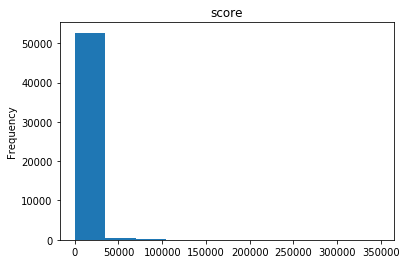

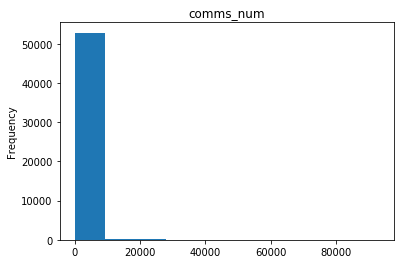

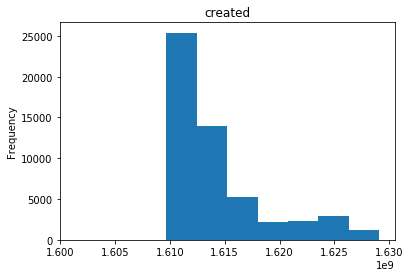

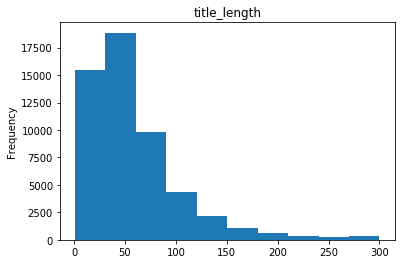

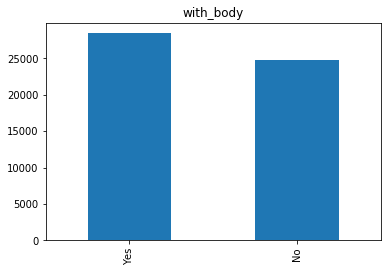

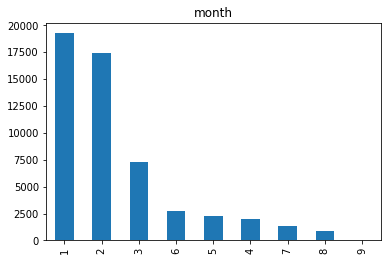

In [51]:
for column in df:
    plt.figure(column)
    plt.title(column)
    
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif pd.api.types.is_string_dtype(df[column]):
        # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind = 'bar')

## Multivariate Analysis

Multivariate Analysis is categorized into three conditions to address various combinations of numerical and categorical data

### 1. Numerical vs Numerical 

Firstly performing Correlation Matrix to find the Correlation between the numeric data type columns.
Then use the heat map to visualize the data.

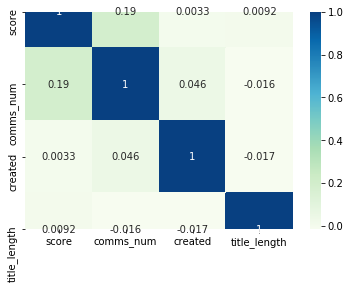

In [58]:
# correlation matrix and heatmap

correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

Obtaining the Pairplot as the correlation matrix only indicated the strenght of linear relationship.
The pairplot and heatmap both ignore the non-numeric data type.

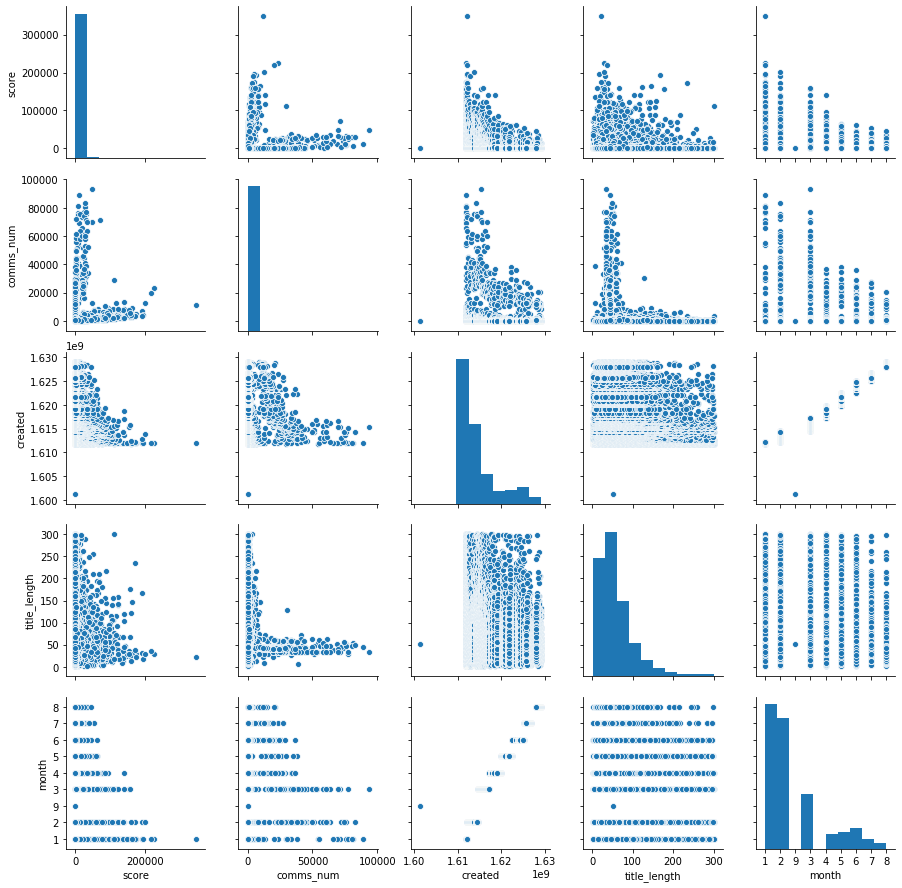

In [59]:
# pairplot

sns.pairplot(df, height = 2.5)

### 2. Categorical vs Categorical 

The relationship between two categorical data types can be visualized by using grouped bar charts.

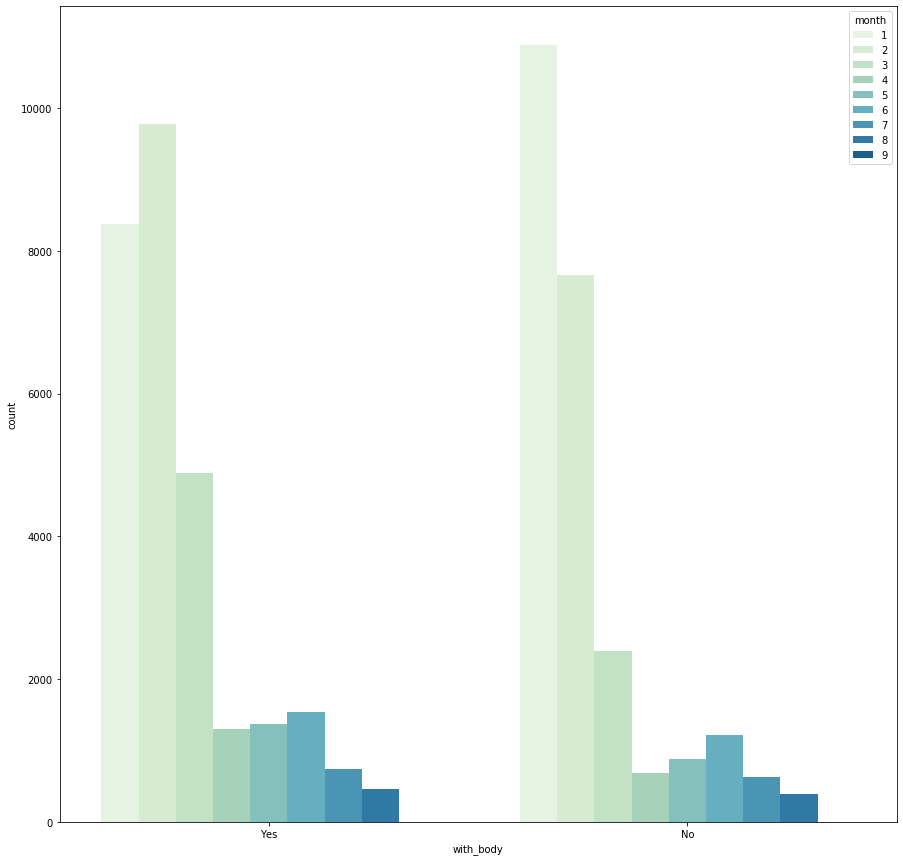

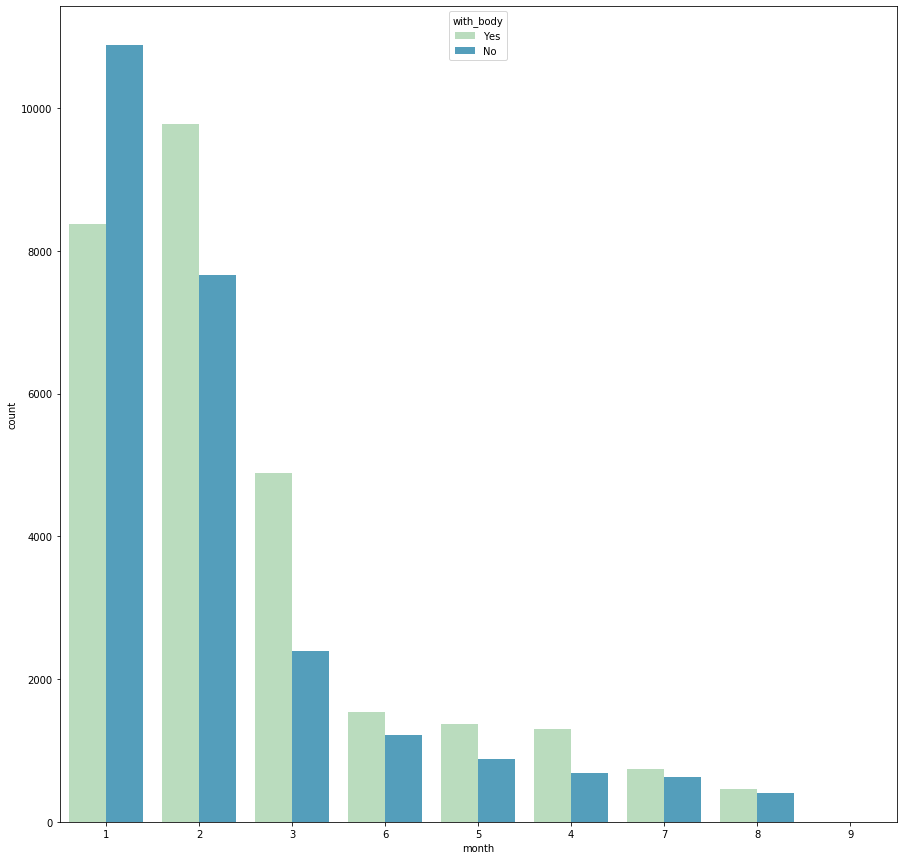

In [64]:
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0, len(cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure(figsize = (15,15))
            chart = sns.countplot(
            data= df,
            x = primary_cat,
            hue = secondary_cat,
            palette = "GnBu",
            order = df[primary_cat].value_counts().iloc[:10].index
            )

### 3. Categorical vs Numerical 

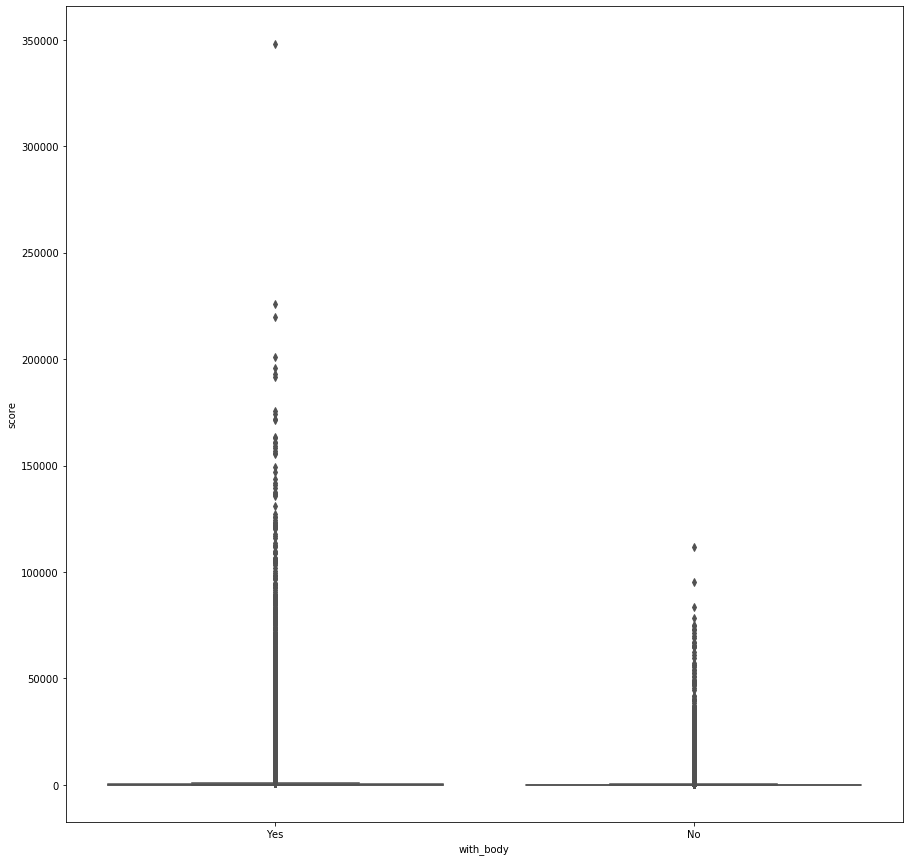

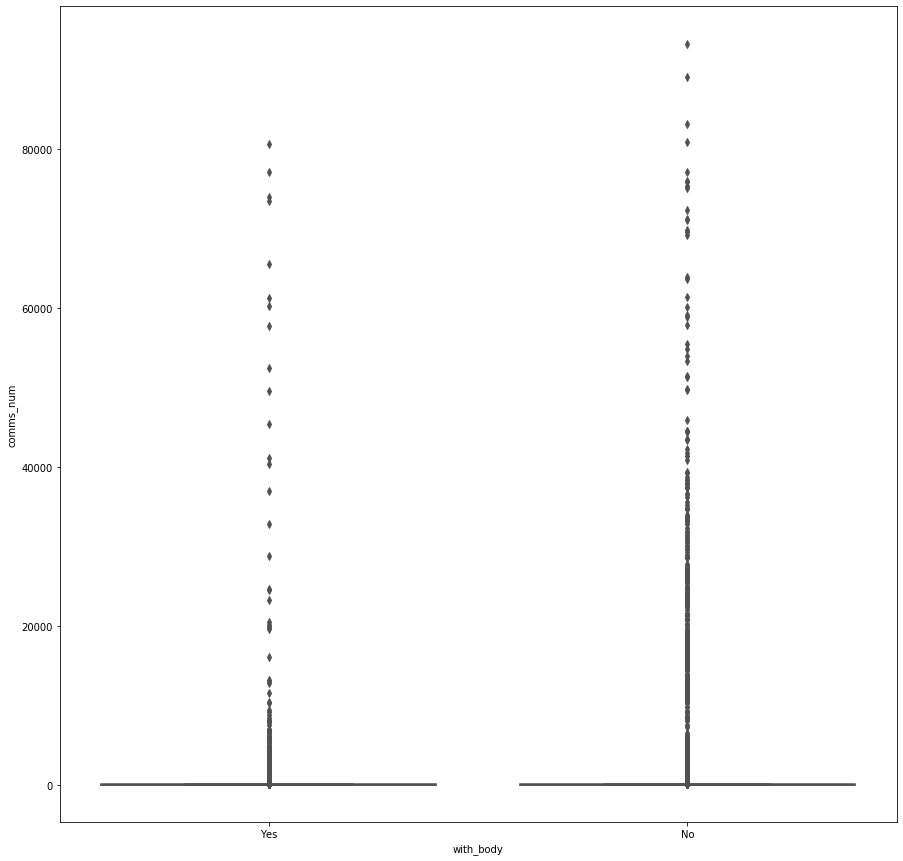

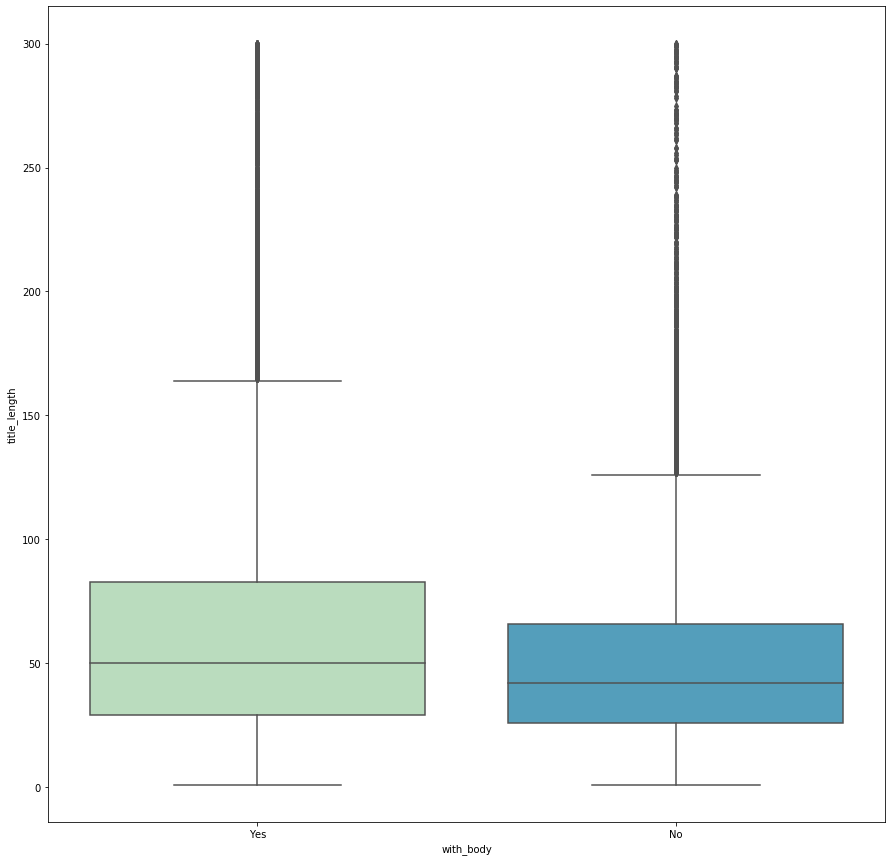

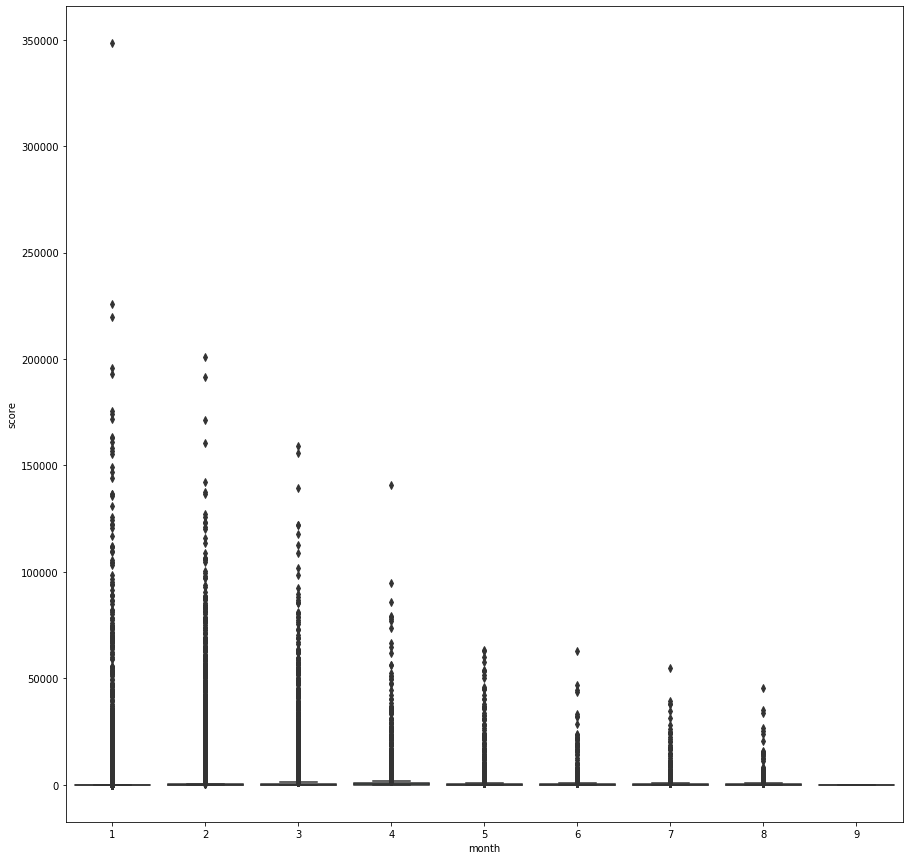

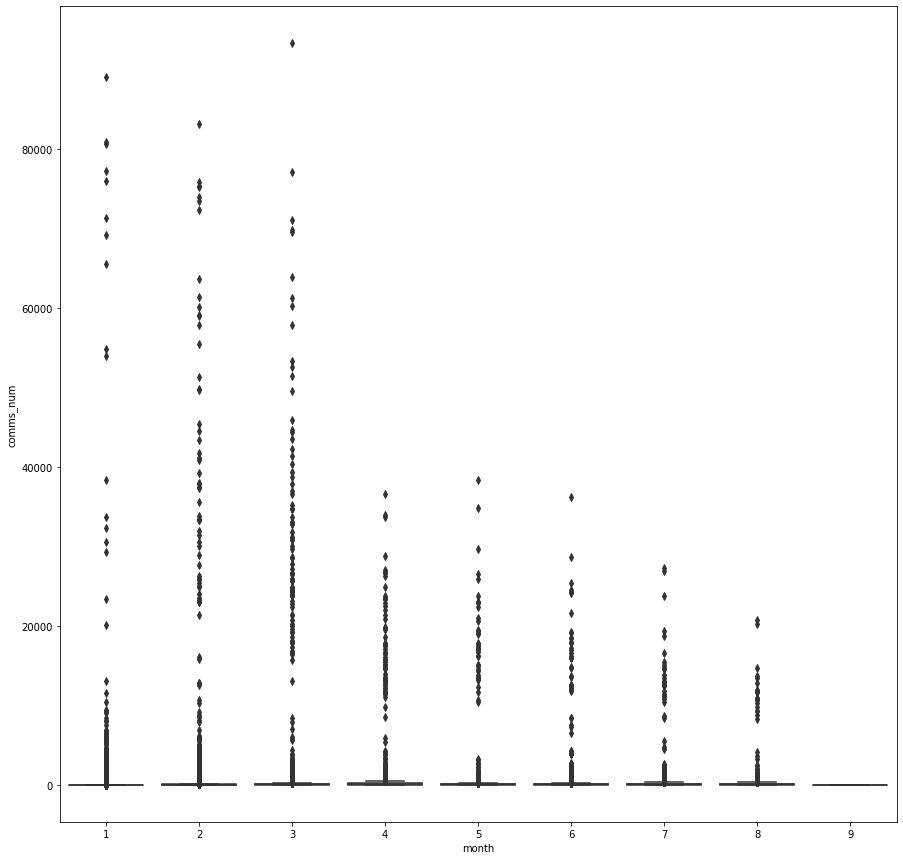

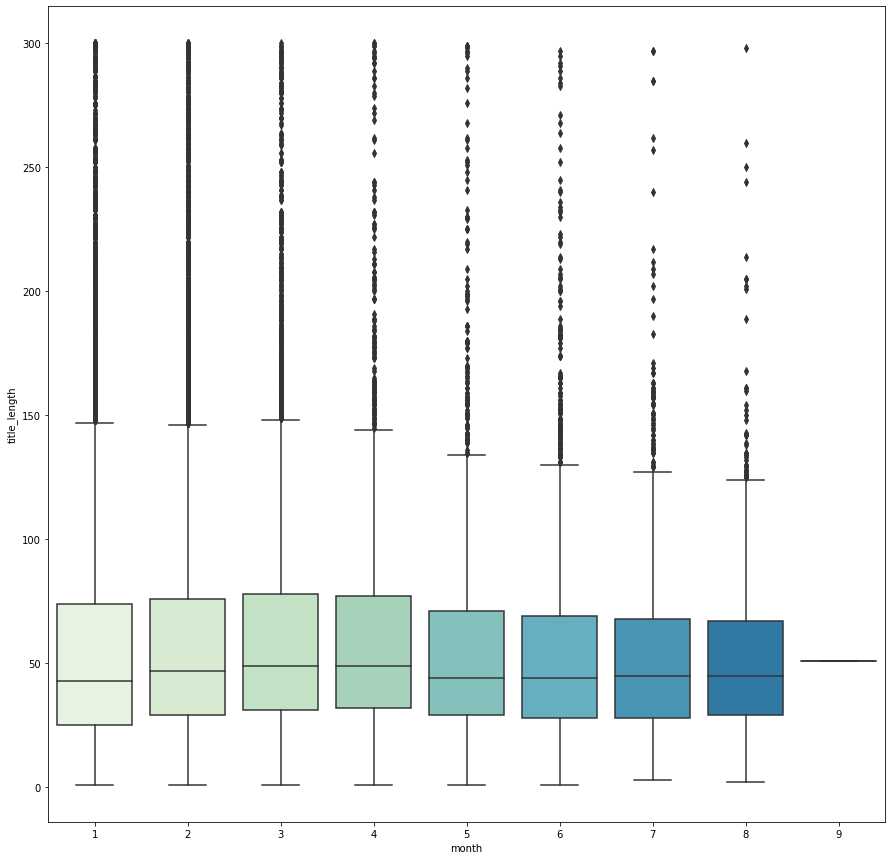

In [65]:
for i in range(0, len(cat_list)):
    cat = cat_list[i]
    for j in range(0, len(num_list)):
        num = num_list[j]
        plt.figure(figsize =(15,15))
        sns.boxplot(x= cat, y =num, data= df, palette = "GnBu")

/Users/apurvainamdar/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/apurvainamdar/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/apurvainamdar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/apurvainamdar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


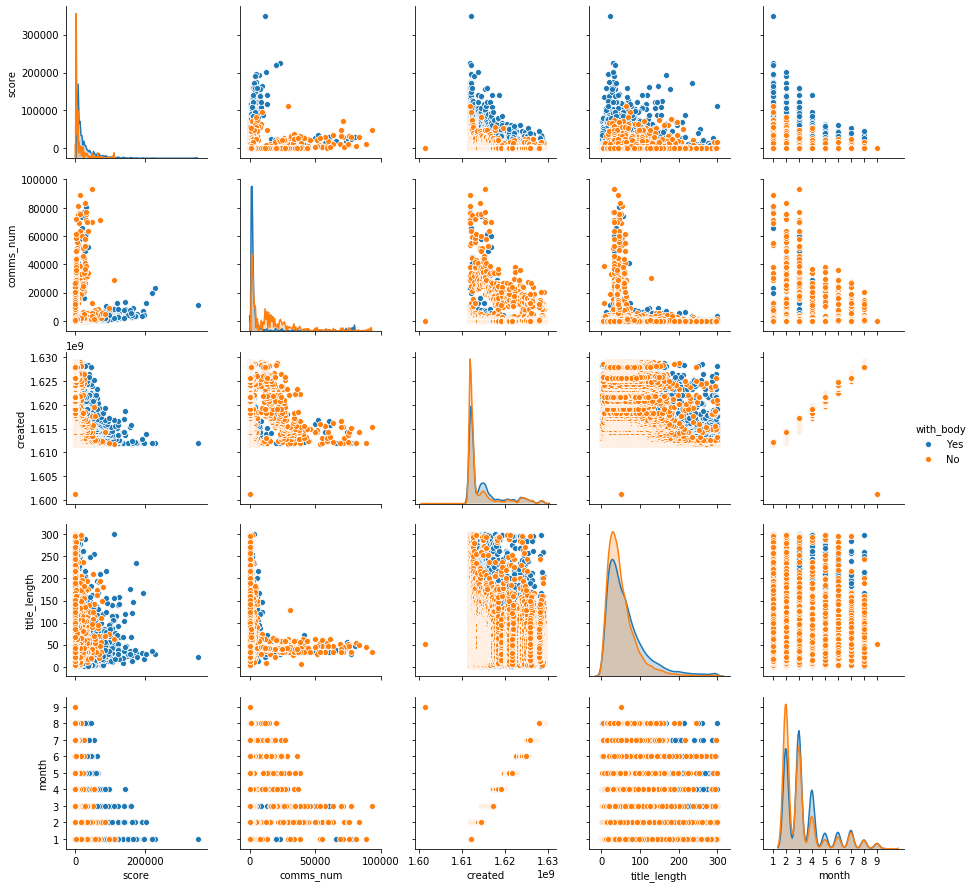

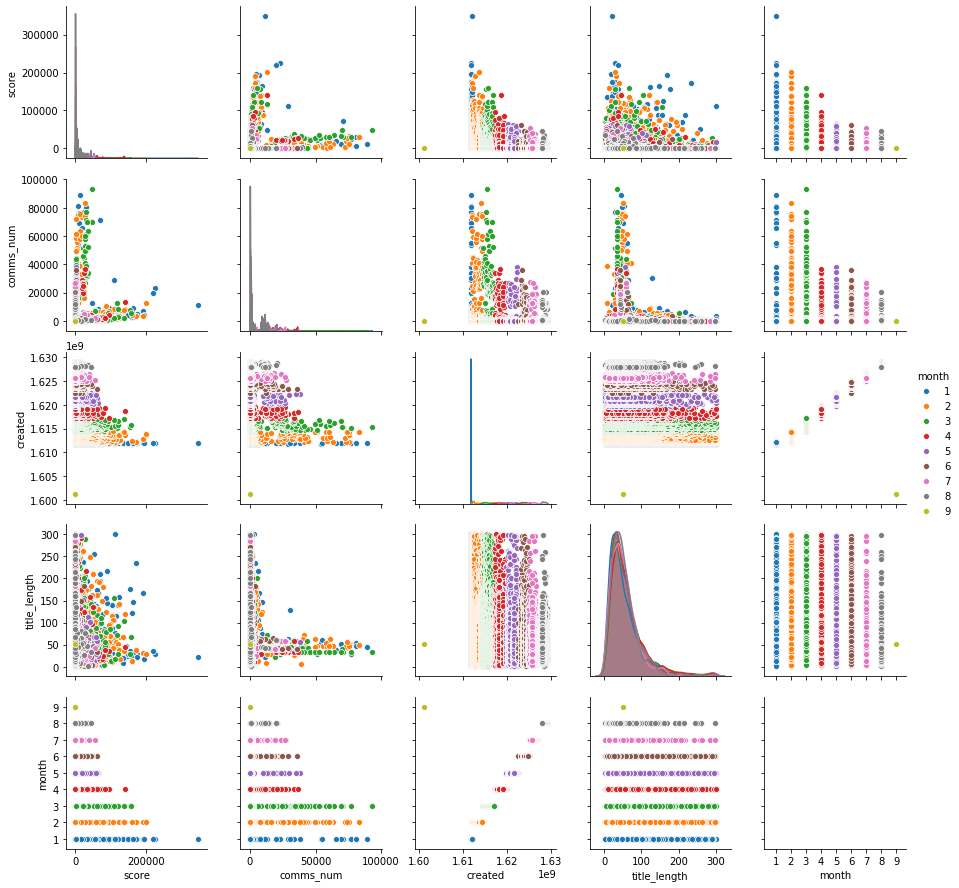

In [67]:
for i in range(0,len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue = hue_cat)